`Import the modules`

In [502]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

`Read the data from the csv file and make a pandas dataframe of that`

In [503]:
df = pd.read_csv('profiles.csv')

`Get some info about the dataframe`

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [505]:
df.head(1)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


`Fill the "nan" values of the height column with the average value of the series`

In [506]:
df.height = df.height.fillna(np.mean(df.height))
df.height = df.height*2.54

`Take a look at the "nan" values of the whole dataframe`

In [507]:
df_isna = df.isna().sum().sort_values()
#df_isna

`Choose some and categorical and numerical variables and put them into a list`

In [508]:
cats_and_nums = ['age', 'sex', 'orientation', 'income', 'height', 'status', 'drinks', 'body_type', 'smokes']

`Making pie charts, countplots and histograms of the features from the list`

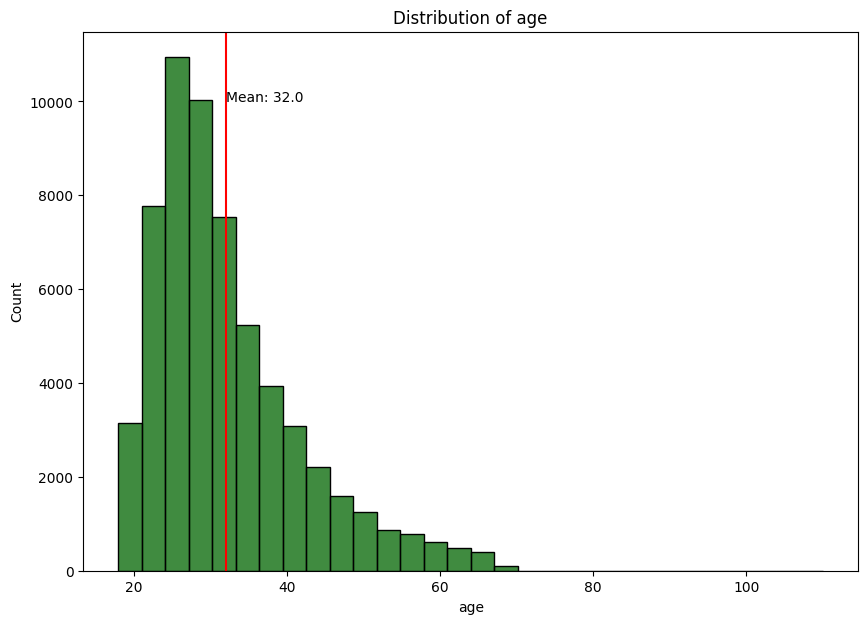

<Figure size 640x480 with 0 Axes>

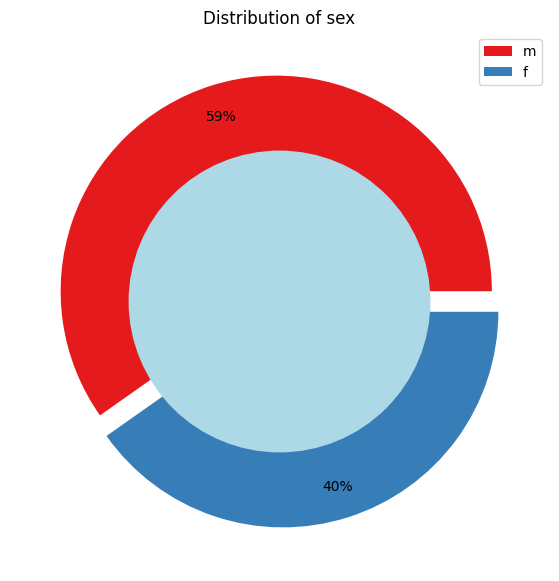

<Figure size 640x480 with 0 Axes>

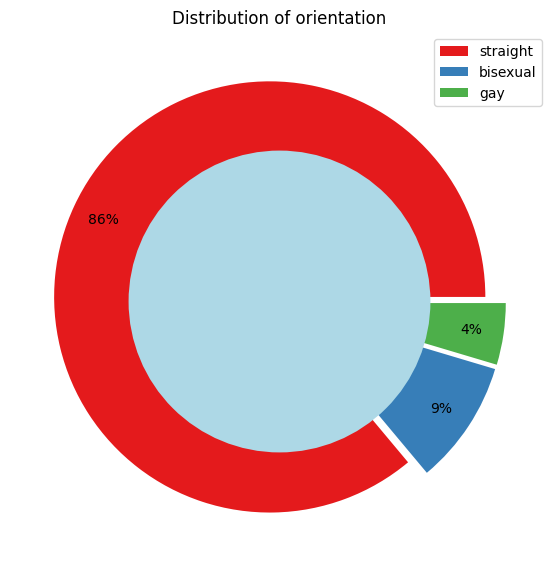

<Figure size 640x480 with 0 Axes>

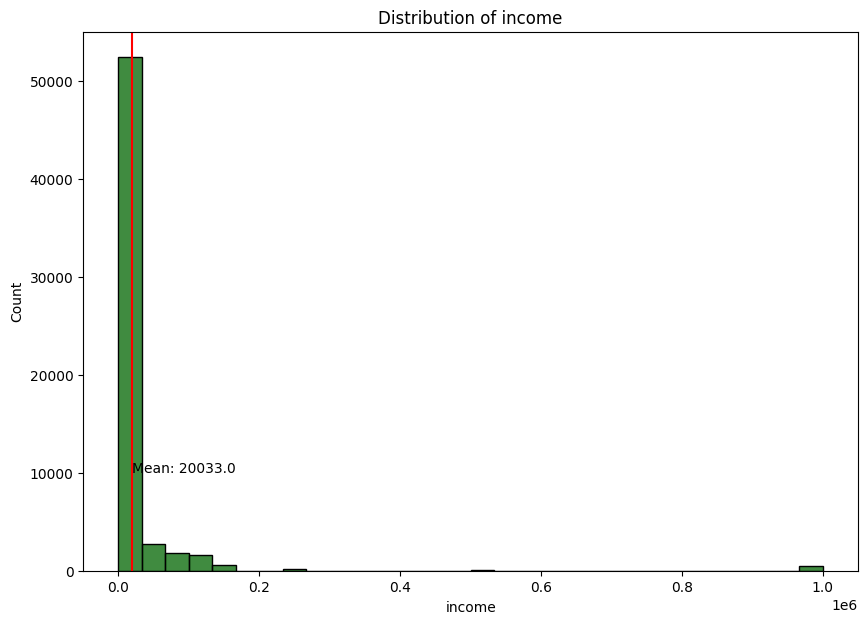

<Figure size 640x480 with 0 Axes>

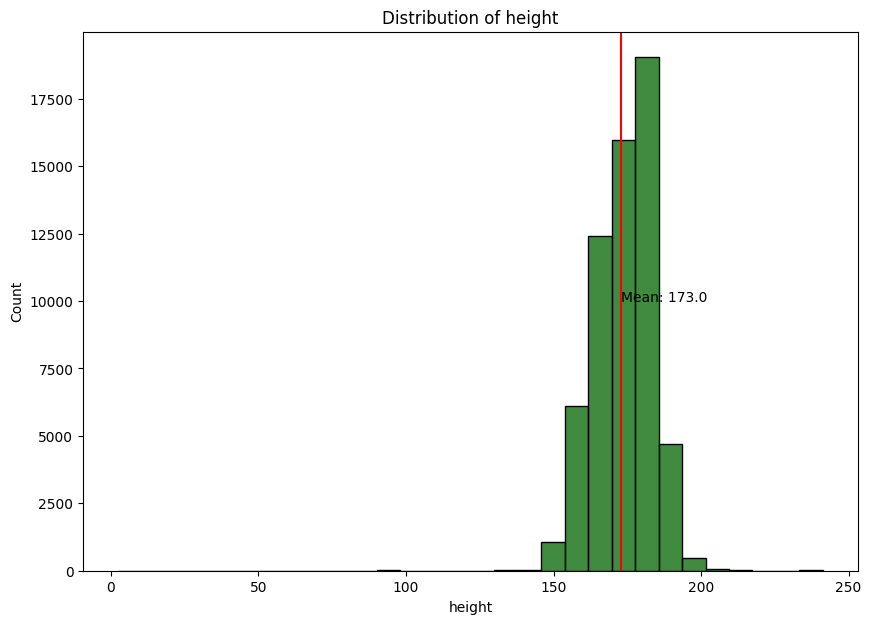

<Figure size 640x480 with 0 Axes>

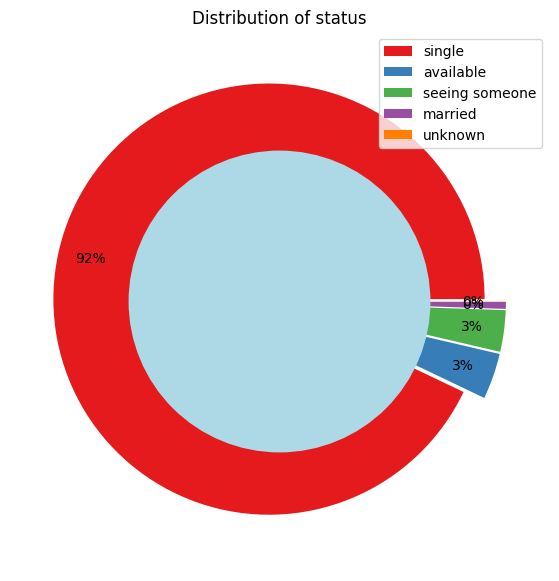

<Figure size 640x480 with 0 Axes>

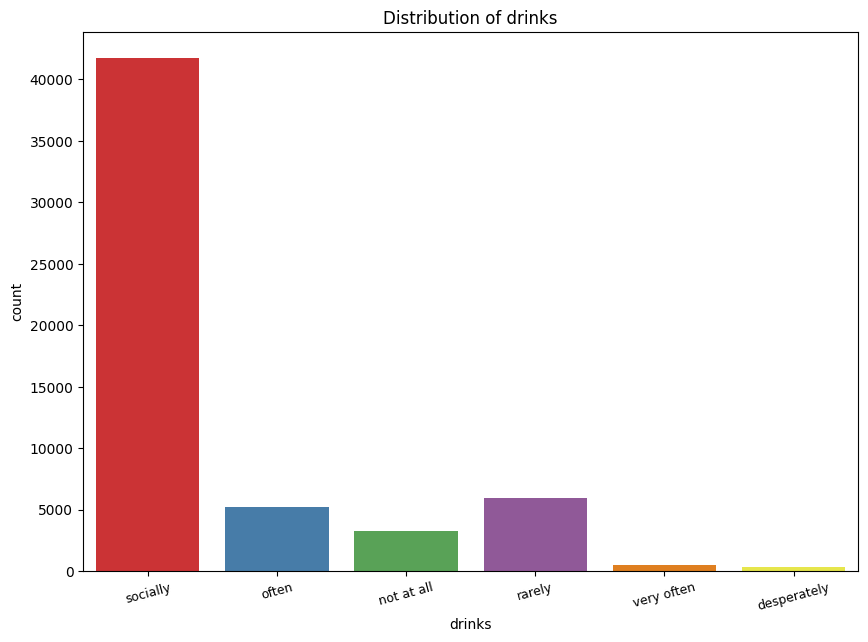

<Figure size 640x480 with 0 Axes>

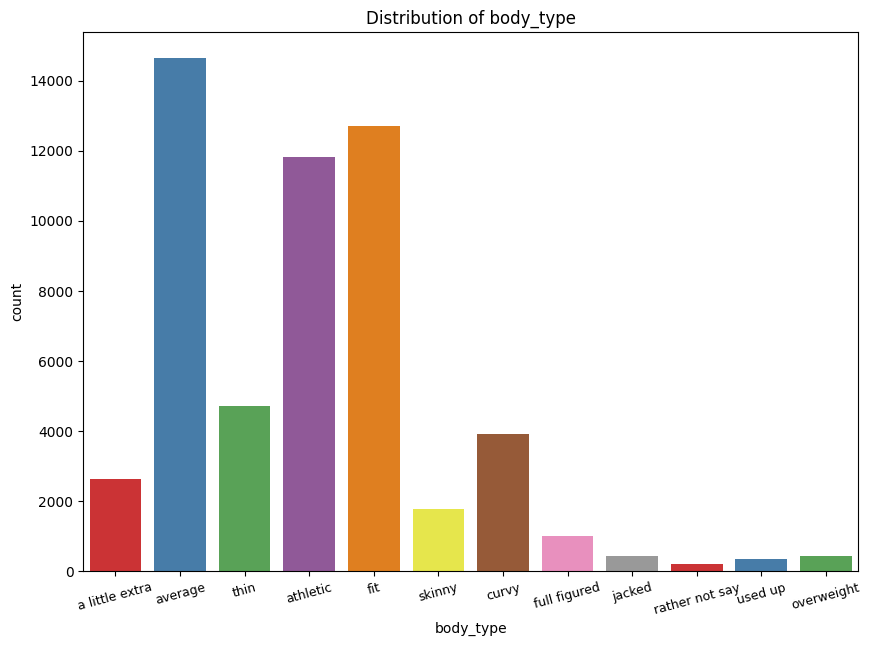

<Figure size 640x480 with 0 Axes>

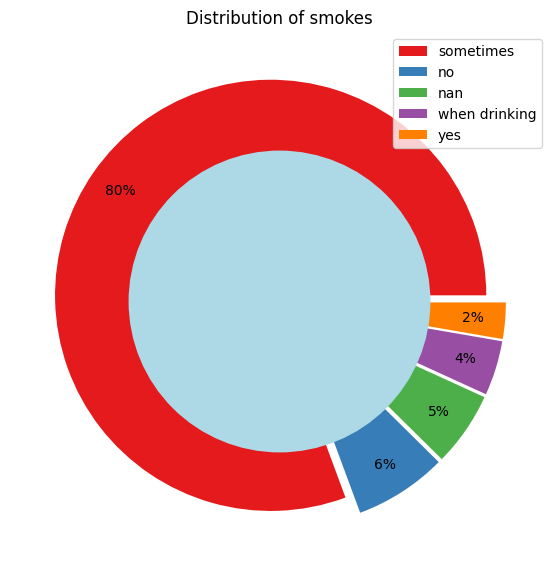

<Figure size 640x480 with 0 Axes>

In [509]:
for feature in cats_and_nums:
    plt.figure(figsize=[10, 7])
    a = df[feature]
    if a.dtype == 'object':
        if a.nunique() < 6:
            plt.pie(a.value_counts(), autopct='%d%%', pctdistance=.85, explode=[0.05 for i in range(a.nunique())], colors=sns.color_palette('Set1'))
            plt.title(f'Distribution of {feature}')
            plt.legend(a.unique())
            plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.7, facecolor='lightblue'))
        else:
            sns.countplot(x=a, saturation=0.75, palette='Set1')
            plt.title(f'Distribution of {feature}')
            plt.xticks(rotation=15, fontsize=9)
    elif a.dtype in ['int64', 'float64']:
        sns.histplot(a, bins=30, color='darkgreen')
        plt.title(f'Distribution of {feature}')
        mean = np.mean(a).round()
        plt.axvline(mean, color='red')
        plt.text(x=mean, y=10000, s=f'Mean: {mean}')
    plt.show()
    plt.clf()

In [510]:
df.smokes = df.smokes.fillna('unknown')

`Change the dtypes of "sex, orientation and status" categorical columns from object to int`

In [511]:
df.sex = np.where(df['sex'] == 'm', 1, 0)
df.orientation = df.orientation.replace(['straight', 'bisexual', 'gay'], [2, 1, 0])
df['status'] = df['status'].replace(['single', 'available', 'seeing someone'], 1)
df['status'] = df['status'].replace(['married', 'unknown'], 0)


`Make the predictor and the outcome variables.`

`X is equal to a pandas dataframe with the chosen features and y is equal to a pandas series with status`

In [512]:
X = df[cats_and_nums[:-4]]
y = df.status

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=15)

In [514]:
model1 = LogisticRegression()

In [515]:
model1.fit(X_train, y_train)

LogisticRegression()

In [516]:
y_pred = model1.predict(X_test)

In [517]:
accuracy_score(y_test, y_pred), model1.score(X_test, y_test)

(0.9953291814946619, 0.9953291814946619)

In [518]:
#df.sign.unique()

In [519]:
sign_dict = {'gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'scorpio',
       'capricorn and it&rsquo;s fun to think about', 'leo',
       'aries but it doesn&rsquo;t matter', 'aries',
       'scorpio but it doesn&rsquo;t matter',
       'sagittarius and it&rsquo;s fun to think about',
       'libra and it matters a lot',
       'taurus and it&rsquo;s fun to think about',
       'leo and it matters a lot',
       'virgo and it&rsquo;s fun to think about',
       'cancer and it matters a lot', 'capricorn',
       'pisces and it matters a lot', 'aries and it matters a lot',
       'capricorn and it matters a lot', 'aquarius and it matters a lot',
       'sagittarius and it matters a lot', 'gemini and it matters a lot',
       'taurus and it matters a lot', 'virgo and it matters a lot'}

NameError: name 'nan' is not defined

In [ ]:
df.location.unique()

In [ ]:
df.sex

In [ ]:
df.columns

In [ ]:
df_new = df.drop(['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9',], axis=1)

In [ ]:
df_new.head(2)

In [ ]:
df_new.body_type.unique(), df_new.drugs.unique(), df_new.drinks.unique()

In [ ]:
features = list(df_new.columns)

In [ ]:
features

In [ ]:
df_new.ethnicity.unique()

In [ ]:
features.pop(6)

In [ ]:
np.max(df_new.last_online.unique())

In [ ]:
np.min(df_new.last_online.unique())

In [ ]:
fix_features = ['age', 'height', 'income', 'sex']

In [ ]:
varied_features = np.random.choice([feature for feature in features if feature != fix_features], 3)

In [ ]:
final_features = fix_features + list(varied_features)

In [ ]:
final_features

In [ ]:
pd.get_dummies(df_new[final_features], drop_first=True)

In [ ]:
df.status.unique()

In [ ]:
df.status.unique()

In [ ]:
y = df.status